## _Miniproject with games dataset in pandas

###  _Exploring world games data with volume of sale more than 100 000 copies.

-------------------------------------------------------------------------------------------------------------------------------

### _Мини-проект по датасету с играми в разных регионах мира.

#### _На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

In [4]:
# Importing needed libraries 
# Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [5]:
# Reading our file with pandas
# Считываем наш файл

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lavrukhin/games.csv')

In [6]:
# 1.Step. Explore data and find missing values in data, if you find it - clear them all. 

# Lets make some EDA
# Сделаем небольшой разведывательный анализ

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Checking for missing data
# Проверяем отсутсвующие данные

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# Checking for unique data
# Смотрим на уникальные данные

df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [9]:
# Lets clear up all missing data from our columns
# Удаляем отсутствующие данные из нужных колонок

df = df.dropna(subset=['Year', 'Publisher'])

In [11]:
# Step 2. Checking the number of games released each year
# Выведите описательные характеристики переменной "Year"

# Questions to answer: 1. Find mode for this values 2. Is it true that half of games were issued after 2007? 3. Median is bigger than mean?

df.Year.value_counts() 

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [12]:
# 1. Finding mode for this values // Mode is 2009 
# 1. Ищем моду для наших данных // Мода равна 2009

sp.stats.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

In [16]:
# 1. Finding median for this values // Median is 2007
# 1. Ищем медиану для наших данных // Медиана равна 2007

df.Year.median()

2007.0

In [17]:
# 1. Lets look for mean for this values // Mean is 2006.405561
# 1. Ищем среднее для наших данных // Среднее равно 2006.405561

df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


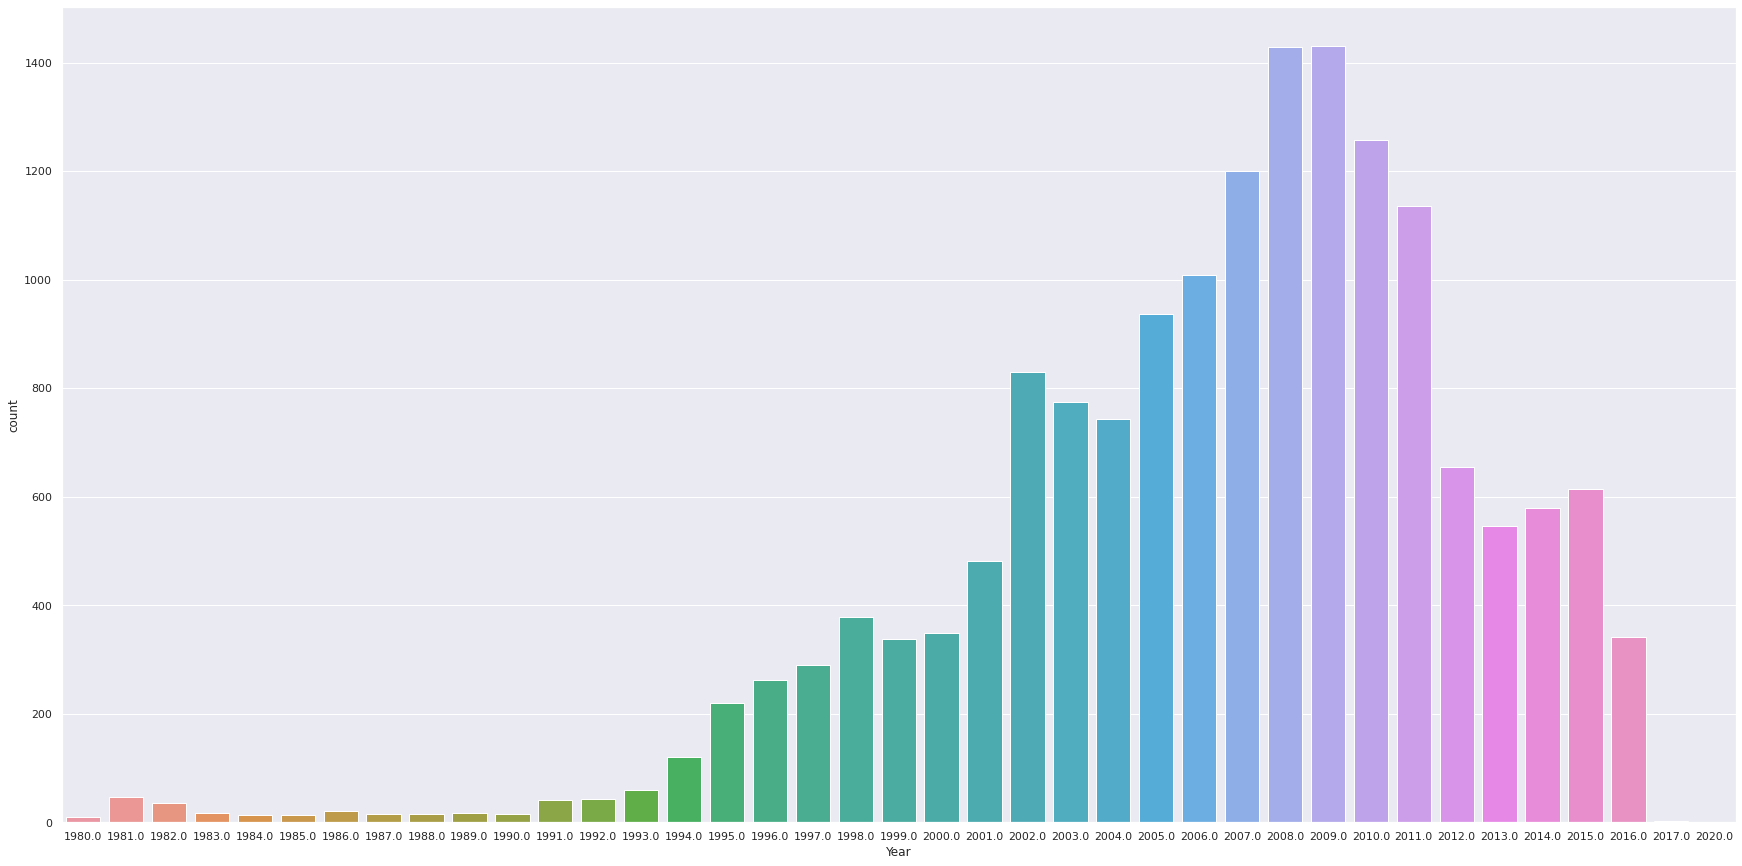

In [14]:
# Step 3. Countplot values 
# Постройте график распределения количества выпущенных игр по годам

width = 30
height = 15
sns.set(rc = {'figure.figsize':(width, height)})
sns.countplot(df.Year)

In [18]:
# Step 4. Which Platforms have more releases? 
# Select only platforms that have frequency of occurrence more than 7%

# На каких платформах произошло больше всего релизов?
# Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%

platform_frequency = df.Platform.value_counts(normalize=True) * 100

# Using Series.where to select only targeted values
platform_frequency.where(platform_frequency > 7, 0)

#Selected platforms are: 'DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       0.000000
XB       0.000000
GBA      0.000000
GC       0.000000
3DS      0.000000
PSV      0.000000
PS4      0.000000
N64      0.000000
SNES     0.000000
XOne     0.000000
SAT      0.000000
WiiU     0.000000
2600     0.000000
NES      0.000000
GB       0.000000
DC       0.000000
GEN      0.000000
NG       0.000000
SCD      0.000000
WS       0.000000
3DO      0.000000
TG16     0.000000
GG       0.000000
PCFX     0.000000
Name: Platform, dtype: float64

In [14]:
# Step 5. Find Publishers that have TOP  frequency of occurrence in dataset. 
# Игры каких издателей (Publisher) встречаются в датасете чаще всего?

df.Publisher.value_counts()

# Our top publisher is "Electronic Arts" with absolute frequency of occurrence 1339. 

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Kokopeli Digital Studios           1
Locus                              1
Interchannel-Holon                 1
TechnoSoft                         1
Wargaming.net                      1
Name: Publisher, Length: 576, dtype: int64

In [21]:
# Step 6. Focus on Nintendo games. Find mean, median, std for regions NA, EU, JP, Other.
# Which region has the highest median?

# Сфокусируемся на играх от Nintendo. 
# Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
# В каком регионе медианное значение объема продаж является наибольшим?

# Filtering our data by only Nintendo games.
# Для начала отфильтруем наши игры и оставим только игры от Нинтендо.

nintendo_df = df.query('Publisher == "Nintendo"')
nintendo_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [22]:
# Find mean, median, std for regions NA, EU, JP, Other
# Найдем среднее, медиану и стандартное отклонение для наших регионов продаж.

nintendo_df1 = nintendo_df.agg({'NA_Sales' : ['mean', 'median', 'std'], 'EU_Sales' : ['mean', 'median', 'std'], 'JP_Sales' : ['mean', 'median', 'std'], 'Other_Sales' : ['mean', 'median', 'std'], 'Global_Sales' : ['mean', 'median', 'std']})
nintendo_df1

# Region with the highest median is NA(North American) regions and Global_Sales and Others are not regions. 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
median,0.375000,0.120000,0.280000,0.030000,0.920000
std,2.989913,1.743953,1.063110,0.464170,5.676925


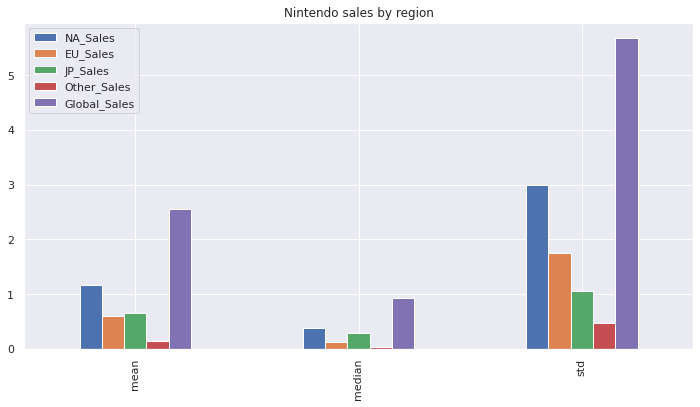

In [24]:
# Lets visualize our data for better understanding.
# Визуализируем наши данные для большей наглядности. 

nintendo_df1.plot(kind='bar', figsize=(12, 6), title='Nintendo sales by region')

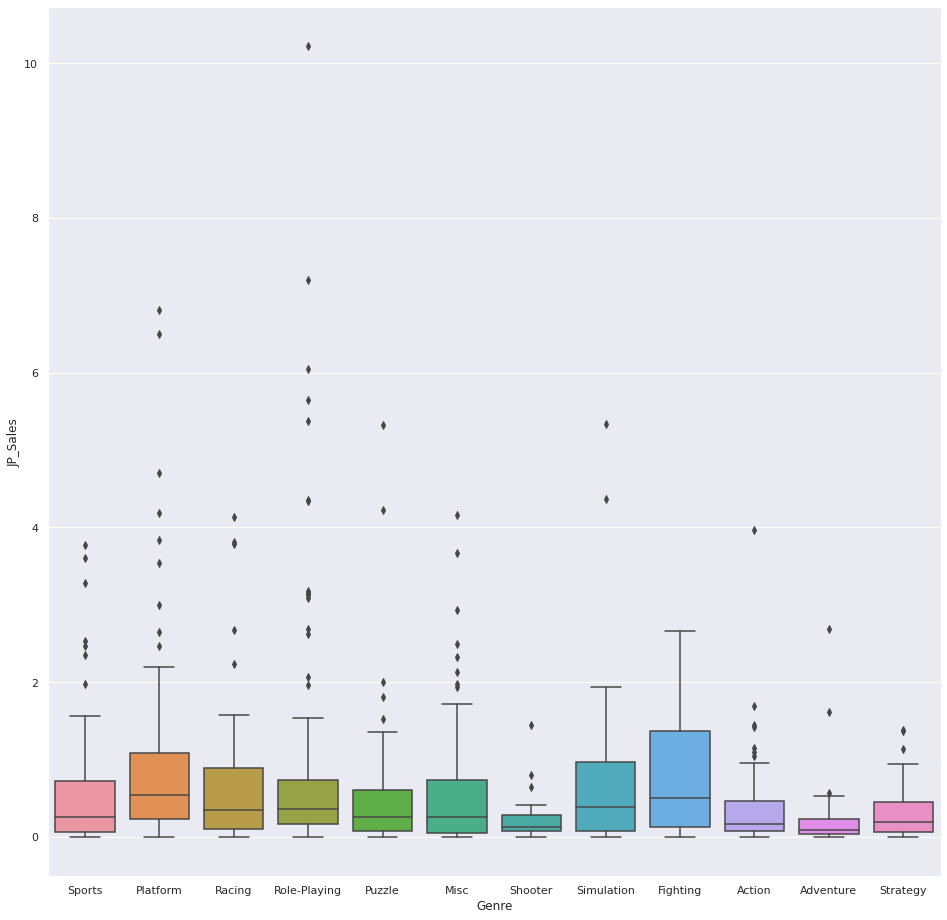

In [18]:
# Step 7. Lets have a look for Nintendo sales in Japan. Create a boxplot. 
# Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот. 

plt.figure(figsize=(16,16))
sns.boxplot(data= nintendo_df, x='Genre', y='JP_Sales')

# Some important findouts from our boxplot:

# 1. Fighting genre has the highest interquartile range.
# Наибольший межквартильный размах наблюдается у игр жанра Fighting

# 2. Strategy genre has lower interquartile range than Puzzle.
# Межквартильный размах у Strategy меньше, чем у Puzzle

# 3. Fighting genre has higher median than Simulation.
# Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

In [27]:
# Step 8. Visualize the change of sales dynamics of Global_Sales by years for Nintendo, genre: Fighting, Simulation, Platform, Racing, Sports.
# In which time period games of Sports genre were popular?

# Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.
# На каком отрезке времени игры жанра Sports были наиболее популярны?

# Filtering our data at first.
# Фильтруем наши данные. 

global_nintendo = nintendo_df.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")

global_nintendo.query('Genre == "Sports"').groupby(['Year', 'Genre'])['Global_Sales'].agg('sum')

Year    Genre 
1983.0  Sports     3.20
1984.0  Sports     6.18
1985.0  Sports     1.96
1987.0  Sports     2.15
1988.0  Sports     2.42
1989.0  Sports     5.72
1990.0  Sports     1.48
1991.0  Sports     1.38
1993.0  Sports     0.80
1994.0  Sports     0.59
1996.0  Sports     0.53
1997.0  Sports     0.17
1998.0  Sports     4.01
1999.0  Sports     0.54
2000.0  Sports     3.57
2002.0  Sports     0.25
2003.0  Sports     1.53
2004.0  Sports     1.89
2005.0  Sports     3.75
2006.0  Sports    84.62
2007.0  Sports    25.63
2008.0  Sports     2.72
2009.0  Sports    56.67
2010.0  Sports     2.18
2012.0  Sports     1.05
2013.0  Sports     1.69
2014.0  Sports     0.88
2015.0  Sports     0.45
Name: Global_Sales, dtype: float64

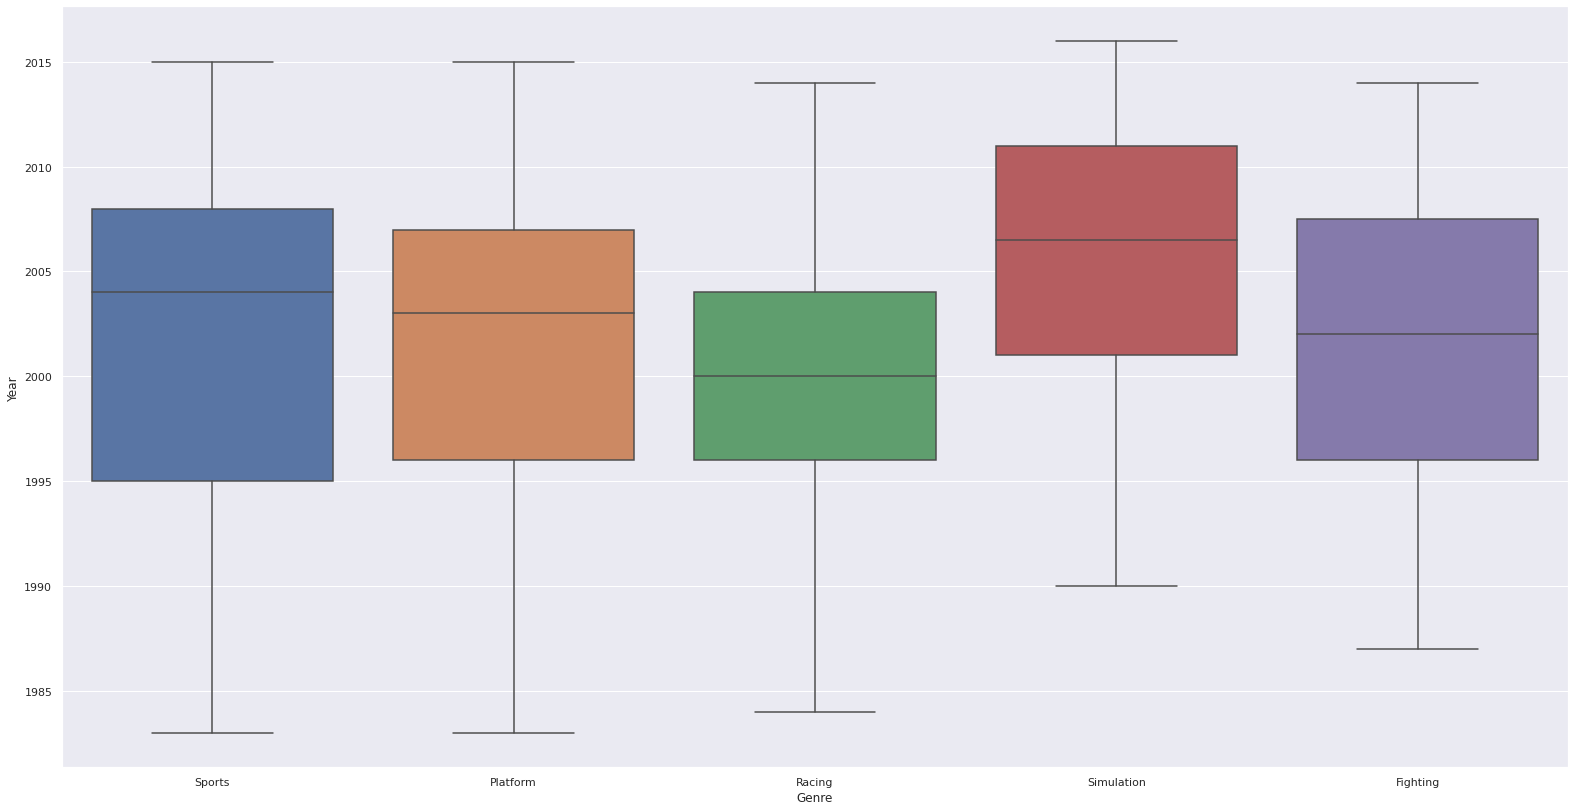

In [38]:
# Boxploting our data to answer our question.
# Визулизируем наши данные чтобы ответить на вопрос. 

plt.figure(figsize=(27,14))
sns.boxplot(data= global_nintendo, x='Genre', y='Year')

# In which time period games of Sports genre were popular? Answer: from 2005 till 2010.
# На каком отрезке времени игры жанра Sports были наиболее популярны? - Ответ: период с 2005 по 2010.